[Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)

Autoencoders について

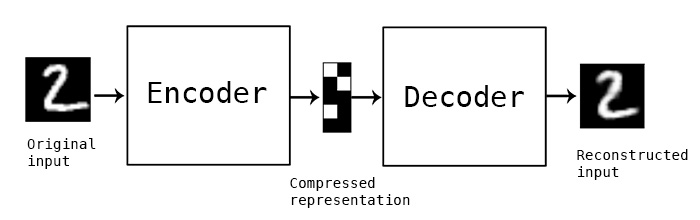

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

### MNISTの数字画像データの準備

In [2]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [3]:
# 正規化
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.
# Flatten
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test  = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### モデルの構築

In [4]:
# 入力画像のサイズ
IMG_SIZE = 28

# Autoencoderの作成
# 配列の要素数は 784 --encoder--> 32 --decoder--> 784 のように変化する
autoencoder = tf.keras.models.Sequential([
    Dense(32, activation='relu', input_shape=(IMG_SIZE*IMG_SIZE,)),
    Dense(IMG_SIZE*IMG_SIZE, activation='sigmoid')
])

autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy')

autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [5]:
autoencoder.fit(x_train, x_train, # データとラベルが同じであることに注意
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2761 - val_loss: 0.1903
Epoch 2/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1709 - val_loss: 0.1534
Epoch 3/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1440 - val_loss: 0.1333
Epoch 4/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1281 - val_loss: 0.1208
Epoch 5/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1179 - val_loss: 0.1125
Epoch 6/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.1110 - val_loss: 0.1069
Epoch 7/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1062 - val_loss: 0.1028
Epoch 8/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1026 - val_loss: 0.0998
Epoch 9/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0999 - val_

## 画像化して確認する

- 上の行がオリジナルの画像
- 下の行がAutoencoderによって再構築した画像

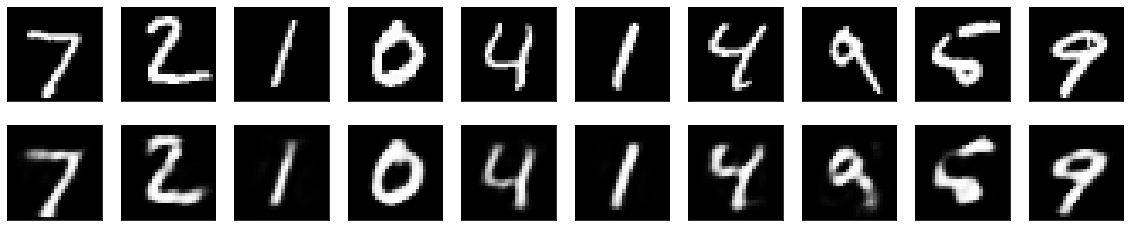

In [6]:
decoded_imgs = autoencoder.predict(x_test)

n = 10  # 表示したい画像の個数
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(IMG_SIZE, IMG_SIZE))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(IMG_SIZE, IMG_SIZE))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Deep autoencoder

層の数を増やすことも可能

In [7]:
autoencoder = tf.keras.models.Sequential([
    # Begin Encoder
    Dense(128, activation='relu', input_shape=(IMG_SIZE*IMG_SIZE,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    # End Encoder
    # Begin Decoder
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(IMG_SIZE*IMG_SIZE, activation='sigmoid')
    # End Decoder
])

autoencoder.compile(optimizer='adam', 
                    loss='binary_crossentropy')

autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
________________________________________________

In [8]:
autoencoder.fit(x_train, x_train, # データとラベルが同じであることに注意
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2434 - val_loss: 0.1651
Epoch 2/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.1487 - val_loss: 0.1357
Epoch 3/20
60000/60000 [==============================] - 3s 45us/sample - loss: 0.1307 - val_loss: 0.1231
Epoch 4/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.1208 - val_loss: 0.1158
Epoch 5/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.1145 - val_loss: 0.1112
Epoch 6/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1104 - val_loss: 0.1078
Epoch 7/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.1076 - val_loss: 0.1057
Epoch 8/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.1053 - val_loss: 0.1031
Epoch 9/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.1035 - val_

### 画像化して確認する

- 上の行がオリジナルの画像
- 下の行がAutoencoderによって再構築した画像

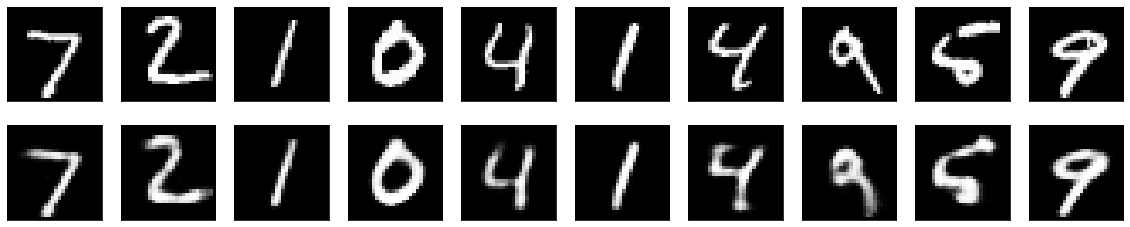

In [9]:
decoded_imgs = autoencoder.predict(x_test)

n = 10  # 表示したい画像の個数
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(IMG_SIZE, IMG_SIZE))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(IMG_SIZE, IMG_SIZE))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Convolutional autoencoder

畳み込みをすることも可能

(ただし、Dense層を使わないので Sequential でモデルを定義できない点に注意)

In [10]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder.compile(optimizer='adadelta', 
                    loss='binary_crossentropy')

autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   

In [11]:
(x_train, _), (x_test, _) = mnist.load_data()

# 正規化
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# 次元を (?, 28, 28) から (?, 28, 28, 1) に変換する
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

autoencoder.fit(x_train, x_train, # データとラベルが同じであることに注意
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 56s 927us/step - loss: 0.2177 - val_loss: 0.1734
Epoch 2/10
60000/60000 [==============================] - 59s 991us/step - loss: 0.1603 - val_loss: 0.1485
Epoch 3/10
60000/60000 [==============================] - 55s 916us/step - loss: 0.1435 - val_loss: 0.1369
Epoch 4/10
60000/60000 [==============================] - 55s 912us/step - loss: 0.1334 - val_loss: 0.1304
Epoch 5/10
60000/60000 [==============================] - 55s 915us/step - loss: 0.1271 - val_loss: 0.1240
Epoch 6/10
60000/60000 [==============================] - 55s 913us/step - loss: 0.1233 - val_loss: 0.1221
Epoch 7/10
60000/60000 [==============================] - 55s 915us/step - loss: 0.1203 - val_loss: 0.1214
Epoch 8/10
60000/60000 [==============================] - 55s 917us/step - loss: 0.1181 - val_loss: 0.1201
Epoch 9/10
60000/60000 [==============================] - 55s 925us/step - loss: 0.1158 - val_

### 画像化して確認する

- 上の行がオリジナルの画像
- 下の行がAutoencoderによって再構築した画像

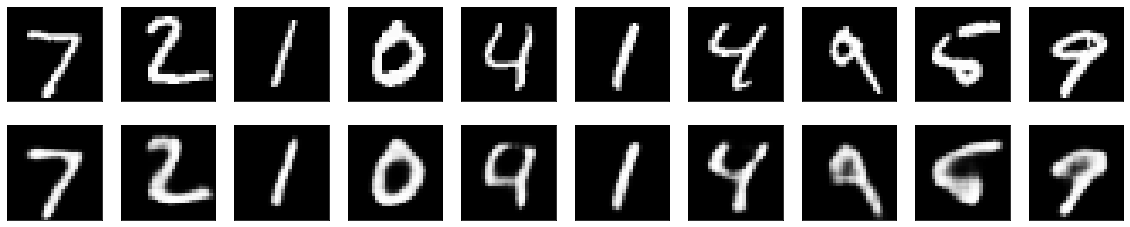

In [12]:
decoded_imgs = autoencoder.predict(x_test)

n = 10  # 表示したい画像の個数
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(IMG_SIZE, IMG_SIZE))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(IMG_SIZE, IMG_SIZE))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 画像のノイズ除去

Autoencodersの応用として、画像のノイズ除去がある

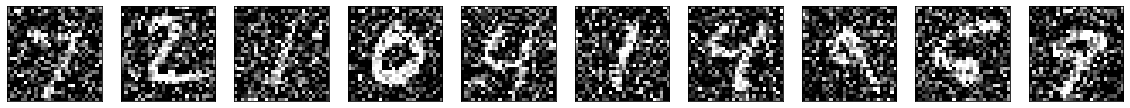

In [13]:
# ノイズを加える
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy  = x_test  + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

# 範囲が0〜1となるように、はみ出た値を最大値/最小値にする
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# ノイズを加えた画像の表示
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 14, 14, 32)        0   

### モデルの訓練

- 入力データ : ノイズを加えた画像
- 教師データ : 元の画像

In [15]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 99s 2ms/step - loss: 0.1662 - val_loss: 0.1169
Epoch 2/5
60000/60000 [==============================] - 98s 2ms/step - loss: 0.1132 - val_loss: 0.1086
Epoch 3/5
60000/60000 [==============================] - 98s 2ms/step - loss: 0.1077 - val_loss: 0.1049
Epoch 4/5
60000/60000 [==============================] - 98s 2ms/step - loss: 0.1048 - val_loss: 0.1030
Epoch 5/5
60000/60000 [==============================] - 98s 2ms/step - loss: 0.1030 - val_loss: 0.1012


### 画像化して確認する

- 上の行がオリジナルの画像
- 下の行がAutoencoderによって再構築した画像

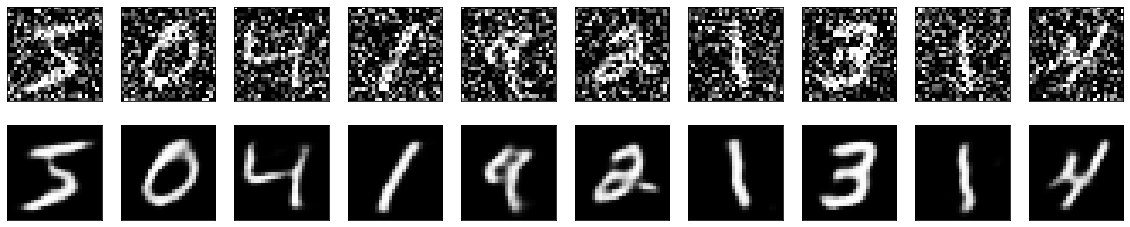

In [16]:
decoded_imgs = autoencoder.predict(x_train_noisy)

n = 10  # 表示したい画像の個数
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train_noisy[i].reshape(IMG_SIZE, IMG_SIZE))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(IMG_SIZE, IMG_SIZE))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

見た感じでは、上手にノイズ除去ができている